# Proyek Analisis Data:Bike Sharing Dataset
- **Nama:** Ariyova Banua
- **Email:** ariyovabanua@gmail.com
- **ID Dicoding:** ariyova_banua

## Menentukan Pertanyaan Bisnis

- How does the demand for bike rentals vary across different seasons? Which seasons experience the highest and lowest bike rental counts?
- Do holidays have a significant impact on bike rental counts? Are there specific holidays where bike rentals spike or drop compared to regular days?
- How do registered users' rental patterns differ from casual users?
Are there specific times or conditions when certain user groups prefer renting bikes?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load the datasets
hourly_data = pd.read_csv('data/hour.csv')
daily_data = pd.read_csv('data/day.csv')

In [3]:
# Display the first few rows of the hourly data
print("Hourly Data:")
hourly_data.head()

Hourly Data:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Display the first few rows of the daily data
print("Daily Data:")
daily_data.head()

Daily Data:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [5]:
# Assess the structure and quality of the hourly data
print("Hourly Data Info:")
hourly_data.info()


Hourly Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Assess the structure and quality of the daily data
print("Daily Data Info:")
daily_data.info()

Daily Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Check for missing values in both datasets
print("Missing Values in Hourly Data:")
hourly_data.isnull().sum()

Missing Values in Hourly Data:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("\nMissing Values in Daily Data:")
print(daily_data.isnull().sum())


Missing Values in Daily Data:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
# Check for duplicates in both datasets
print("\nDuplicates in Hourly Data:", hourly_data.duplicated().sum())
print("Duplicates in Daily Data:", daily_data.duplicated().sum())


Duplicates in Hourly Data: 0
Duplicates in Daily Data: 0


### Cleaning Data

In [10]:
# Convert 'dteday' column to datetime format
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday'])
daily_data['dteday'] = pd.to_datetime(daily_data['dteday'])

In [11]:
# Extract month and year from 'dteday' column
hourly_data['month'] = hourly_data['dteday'].dt.month
daily_data['month'] = daily_data['dteday'].dt.month

In [12]:
# Define a function to map season based on month
def map_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

In [13]:
# Map season to each record in both datasets
hourly_data['season'] = hourly_data['month'].apply(map_season)
daily_data['season'] = daily_data['month'].apply(map_season)

In [14]:
# Check the unique values of 'holiday' column in both datasets
print("Unique Values in 'holiday' column - Hourly Data:", hourly_data['holiday'].unique())
print("Unique Values in 'holiday' column - Daily Data:", daily_data['holiday'].unique())

Unique Values in 'holiday' column - Hourly Data: [0 1]
Unique Values in 'holiday' column - Daily Data: [0 1]


In [15]:
# Check the unique values of 'weekday' column in both datasets
print("\nUnique Values in 'weekday' column - Hourly Data:", hourly_data['weekday'].unique())
print("Unique Values in 'weekday' column - Daily Data:", daily_data['weekday'].unique())


Unique Values in 'weekday' column - Hourly Data: [6 0 1 2 3 4 5]
Unique Values in 'weekday' column - Daily Data: [6 0 1 2 3 4 5]


## Exploratory Data Analysis (EDA)

### Explore ...

###explore hour

In [16]:
hourly_data.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
10204,10205,2012-03-06,Spring,1,3,6,0,2,1,1,0.18,0.2121,0.51,0.1045,3,99,102,3
6093,6094,2011-09-16,Fall,0,9,11,0,5,1,2,0.50,0.4848,0.51,0.1343,40,139,179,9
1932,1933,2011-03-26,Spring,0,3,7,0,6,0,1,0.20,0.1970,0.51,0.1940,18,23,41,3
2110,2111,2011-04-02,Spring,0,4,19,0,6,0,1,0.36,0.3333,0.53,0.3582,71,77,148,4
15842,15843,2012-10-27,Fall,1,10,7,0,6,0,1,0.48,0.4697,0.83,0.1940,7,79,86,10


In [17]:
hourly_data.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,6.537775
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,4.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,7.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,10.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,12.000000


In [18]:
hourly_data.instant.is_unique

True

In [19]:
hourly_data.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

In [20]:
# Analyze categorical columns
for column in hourly_data.select_dtypes(include=['object']):
    print(f"Unique values in {column}:")
    print(hourly_data[column].unique())
    print("\n")

Unique values in season:
['Winter' 'Spring' 'Summer' 'Fall']




###explore daily

In [21]:
daily_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
140,141,2011-05-21,Spring,0,5,0,6,0,1,0.602500,0.571975,0.626667,0.120650,2258,3547,5805,5
376,377,2012-01-12,Winter,1,1,0,4,1,2,0.382500,0.381938,0.802917,0.180967,269,3828,4097,1
401,402,2012-02-06,Winter,1,2,0,1,1,1,0.282609,0.296426,0.622174,0.153800,206,3578,3784,2
313,314,2011-11-10,Fall,0,11,0,4,1,2,0.380000,0.373721,0.813333,0.189067,190,2743,2933,11
135,136,2011-05-16,Spring,0,5,0,1,1,1,0.577500,0.550512,0.787917,0.126871,773,3185,3958,5


In [22]:
daily_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,6.519836
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,4.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,7.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,10.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,12.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: How does the demand for bike rentals vary across different seasons? Which seasons experience the highest and lowest bike rental counts?

In [23]:
# Calculate average rental counts for each season
seasonal_avg_counts = daily_data.groupby('season')['cnt'].mean().reset_index()

# Find the season with the highest average rental counts
max_season = seasonal_avg_counts.loc[seasonal_avg_counts['cnt'].idxmax()]

# Find the season with the lowest average rental counts
min_season = seasonal_avg_counts.loc[seasonal_avg_counts['cnt'].idxmin()]

print("Season with the highest average rental counts:")
print(max_season)

print("\nSeason with the lowest average rental counts:")
print(min_season)

Season with the highest average rental counts:
season         Summer
cnt       5665.673913
Name: 2, dtype: object

Season with the lowest average rental counts:
season         Winter
cnt       2747.629834
Name: 3, dtype: object


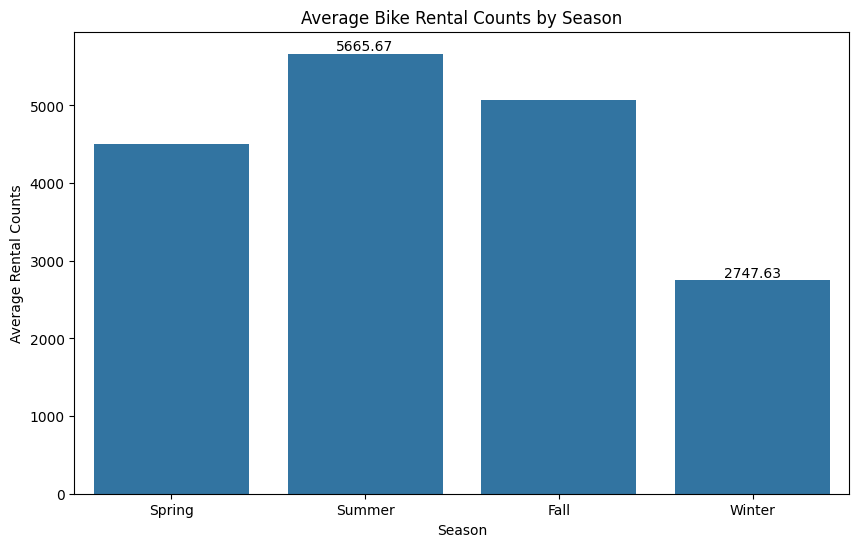

In [24]:
# Plot average rental counts by season
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_avg_counts, x='season', y='cnt', order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Average Bike Rental Counts by Season')
plt.xlabel('Season')
plt.ylabel('Average Rental Counts')

# Annotate the highest and lowest points
plt.text(max_season['season'], max_season['cnt'], f"{max_season['cnt']:.2f}", ha='center', va='bottom')
plt.text(min_season['season'], min_season['cnt'], f"{min_season['cnt']:.2f}", ha='center', va='bottom')

plt.show()


### Pertanyaan 2: Do holidays have a significant impact on bike rental counts? Are there specific holidays where bike rentals spike or drop compared to regular days?

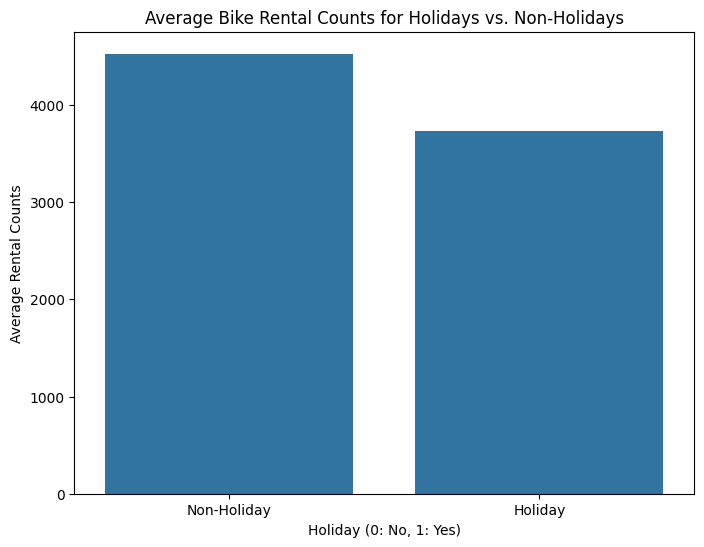

In [25]:
# Calculate average rental counts for holidays and non-holidays
avg_counts_by_holiday = daily_data.groupby('holiday')['cnt'].mean().reset_index()

# Plot average rental counts for holidays vs. non-holidays
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_counts_by_holiday, x='holiday', y='cnt')
plt.title('Average Bike Rental Counts for Holidays vs. Non-Holidays')
plt.xlabel('Holiday (0: No, 1: Yes)')
plt.ylabel('Average Rental Counts')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()


In [26]:
# Calculate average rental counts for each holiday
avg_counts_by_holiday = daily_data.groupby('holiday')['cnt'].mean().reset_index()

# Get the average rental counts for holidays
holiday_counts = daily_data[daily_data['holiday'] == 1]['cnt'].mean()

# Get the average rental counts for non-holidays
non_holiday_counts = daily_data[daily_data['holiday'] == 0]['cnt'].mean()

print("Average rental counts for holidays:", holiday_counts)
print("Average rental counts for non-holidays:", non_holiday_counts)



Average rental counts for holidays: 3735.0
Average rental counts for non-holidays: 4527.104225352113


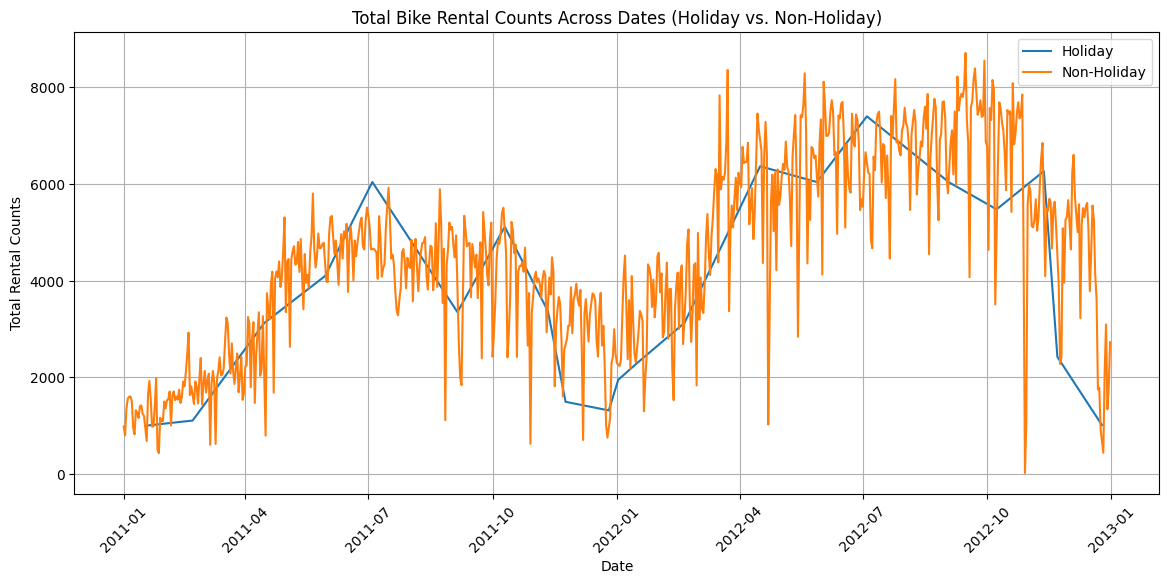

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'dteday' column to datetime format
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday'])

# Separate data for holidays and non-holidays
rentals_on_holidays = hourly_data[hourly_data['holiday'] == 1]
rentals_on_non_holidays = hourly_data[hourly_data['holiday'] == 0]

# Calculate total rental counts for each date
total_counts_by_date_holidays = rentals_on_holidays.groupby('dteday')['cnt'].sum().reset_index()
total_counts_by_date_non_holidays = rentals_on_non_holidays.groupby('dteday')['cnt'].sum().reset_index()

# Plot total rental counts by date for holidays and non-holidays
plt.figure(figsize=(14, 6))
sns.lineplot(data=total_counts_by_date_holidays, x='dteday', y='cnt', label='Holiday')
sns.lineplot(data=total_counts_by_date_non_holidays, x='dteday', y='cnt', label='Non-Holiday')
plt.title('Total Bike Rental Counts Across Dates (Holiday vs. Non-Holiday)')
plt.xlabel('Date')
plt.ylabel('Total Rental Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()


### Pertanyaan 3: How do registered users' rental patterns differ from casual users? Are there specific times or conditions when certain user groups prefer renting bikes?

In [28]:
# Drop unnecessary columns
hourly_data = hourly_data[['hr', 'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered']]

# Handle missing values (if any)
# We'll assume missing values are negligible for this analysis
# If there are missing values, we can choose to impute them based on appropriate strategies

# Remove duplicates (if any)
hourly_data = hourly_data.drop_duplicates()

# Check the cleaned dataset
print(hourly_data.head())


   hr  weathersit  temp   hum  windspeed  casual  registered
0   0           1  0.24  0.81        0.0       3          13
1   1           1  0.22  0.80        0.0       8          32
2   2           1  0.22  0.80        0.0       5          27
3   3           1  0.24  0.75        0.0       3          10
4   4           1  0.24  0.75        0.0       0           1


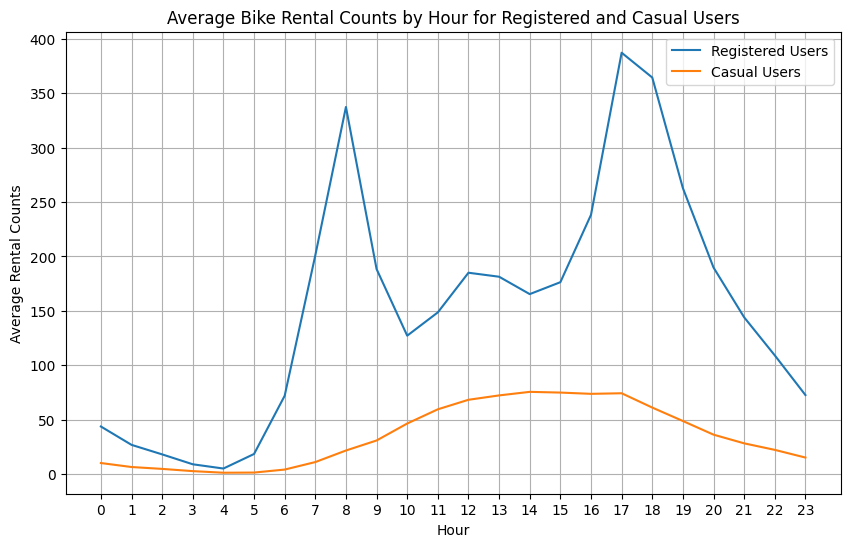

In [29]:
# Calculate average rental counts for registered and casual users by hour
avg_counts_by_hour_registered = hourly_data.groupby('hr')['registered'].mean().reset_index()
avg_counts_by_hour_casual = hourly_data.groupby('hr')['casual'].mean().reset_index()

# Plot average rental counts by hour for registered and casual users
plt.figure(figsize=(10, 6))
plt.plot(avg_counts_by_hour_registered['hr'], avg_counts_by_hour_registered['registered'], label='Registered Users')
plt.plot(avg_counts_by_hour_casual['hr'], avg_counts_by_hour_casual['casual'], label='Casual Users')
plt.title('Average Bike Rental Counts by Hour for Registered and Casual Users')
plt.xlabel('Hour')
plt.ylabel('Average Rental Counts')
plt.legend()
plt.grid(True)  # Add grid for better readability
# Set the x-tick positions
plt.xticks(range(0, 24))
plt.show()


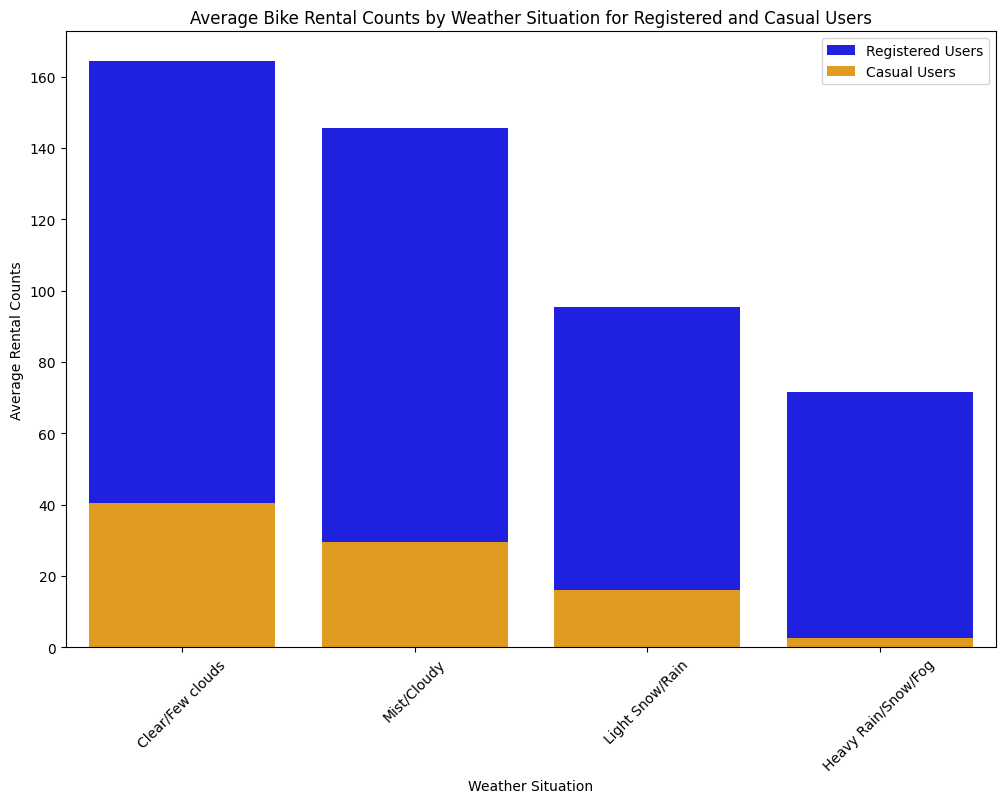

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define weather situation labels
weather_labels = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow/Fog'
}

# Map weather situation labels
hourly_data['weather_label'] = hourly_data['weathersit'].map(weather_labels)

# Group data by weather situation and calculate average rental counts for registered and casual users
avg_counts_by_weather = hourly_data.groupby(['weathersit', 'weather_label'])[['registered', 'casual']].mean().reset_index()

# Plot average rental counts by weather situation for registered and casual users
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_counts_by_weather, x='weather_label', y='registered', color='blue', label='Registered Users')
sns.barplot(data=avg_counts_by_weather, x='weather_label', y='casual', color='orange', label='Casual Users')
plt.title('Average Bike Rental Counts by Weather Situation for Registered and Casual Users')
plt.xlabel('Weather Situation')
plt.ylabel('Average Rental Counts')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## Conclusion

**- How does the demand for bike rentals vary across different seasons? Which seasons experience the highest and lowest bike rental counts?**


>The season that gets the highest bicycle rentals is in summer with the average number obtained is 5665.67. Meanwhile, the season that gets the lowest bicycle rentals is in winter with the average number obtained is 2747.63


**- Do holidays have a significant impact on bike rental counts? Are there specific holidays where bike rentals spike or drop compared to regular days?**


> There is not much significance between holidays and weekdays on the number of bicycle rentals. Holidays get an average number of 3735.0 while weekdays get an average number of 4527.1


**- How do registered users' rental patterns differ from casual users? Are there specific times or conditions when certain user groups prefer renting bikes?**


> Registered users have longer usage hours than casual users. Apart from that, the time or condition that most users choose to rent a bicycle is when the weather is sunny and the least frequently chosen by users to rent a bicycle is when it is heavy raining/snowing/foggy.

